<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  FINAL PROJECT – Programming for Data Science
</div>

Group members:
| Name              | ID       |
|-------------------|----------|
| Trương Công Gia Phát |21127667|
| Trần Thái Toàn  | 21127743 |

(Last updated: 25/12/2023)

## Table of Content

- [1. Collecting Data](#cc1)
- [2. Exploring Data](#cc2)
- [3. Simple Visualization](#cc3)
- [4. Asking meaningful question](#cc4)
- [5. Preprocessing + anlyzing data to answer each question](#cc5)
    + [Question 1](#q1)
    + [Question 2](#q2)
    + [Question 3](#q3)
    + [Question 4](#q4)
- [6. Refection](#cc6)
- [7. Reference material](#cc7)

## Importing neccessary libraries

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import requests
import matplotlib.pyplot as plt

# 1. Collecting data <a class="anchor" id="cc1"></a>

### What subject is your data about?

The dataset provides a comprehensive breakdown of every arrest carried out in New York City by the New York Police Department (NYPD) throughout the current year. This detailed record encompasses a wide range of information, offering insights into the circumstances, demographics, and characteristics of each arrest, contributing to a thorough understanding of law enforcement activities and trends in the city during the specified time period.

### What is the source of your data? Do authors of this data allow you to use like this?

Our group found this dataset on Kaggle and  the data is licensed under the U.S Government Works. This implies that the dataset is a product of the United States government and is therefore in the public domain. As a result, it can be freely accessed, used, and distributed by the public without any copyright restrictions.

### How did authors collect data?

This data is manually extracted every quarter and undergoes thorough review by the Office of Management Analysis and Planning.

# 2. Exploring data <a class="anchor" id="cc2"></a>


In [2]:
df = pd.read_csv('./data/NYPD_Arrest_Data__Year_to_Date_.csv')

### How many rows and how many columns?

In [3]:
shape = df.shape
print(f"The data has {shape[0]} rows and {shape[1]} columns.")

The data has 112571 rows and 19 columns.


### What is the meaning of each row?

Each record represents an arrest effected in NYC by the NYPD and includes information about the type of crime, the location and time of enforcement.

### Are there duplicated rows?

In [4]:
index = df.index
detectDupSeries = index.duplicated(keep='first')
num_duplicated_rows = detectDupSeries.sum()

if num_duplicated_rows == 0:
    print(f"Data have no duplicated line.!")
else:
    if num_duplicated_rows > 1:
        ext = "lines"
    else:
        ext = "line"
    print(f"Data have {num_duplicated_rows} duplicated " + ext + ". Please de-deduplicate your raw data.!")

Data have no duplicated line.!


### What is the meaning of each column?

In [5]:
col_meaning_df = pd.read_csv('./data/data_schema.csv',  usecols=[0, 1])
pd.set_option('display.max_colwidth', 350)
col_meaning_df

,Column,Meaning
0,ARREST_KEY,Randomly generated persistent ID for each arrest
1,ARREST_DAT,Exact date of arrest for the reported event
2,PD_C,Three digit internal classification code (more granular than Key Code)
3,PD_DESC,Description of internal classification corresponding with PD code (more granular than Offense Description)
4,KY_CD,Three digit internal classification code (more general category than PD code)
5,OFNS_DESC,Description of internal classification corresponding with KY code (more general category than PD description)
6,LAW_CODE,Law code charges corresponding to the NYS Penal Law
7,LAW_CAT_CD,Level of offens: felony
8,ARREST_BORO,Borough of arrest B(Bronx)
9,ARREST_PRECINCT,Precinct where the arrest occurred


### What is the current data type of each column? Are there columns having inappropriate data types?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112571 entries, 0 to 112570
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                112571 non-null  int64  
 1   ARREST_DATE               112571 non-null  object 
 2   PD_CD                     112110 non-null  float64
 3   PD_DESC                   112571 non-null  object 
 4   KY_CD                     112105 non-null  float64
 5   OFNS_DESC                 112571 non-null  object 
 6   LAW_CODE                  112571 non-null  object 
 7   LAW_CAT_CD                111725 non-null  object 
 8   ARREST_BORO               112571 non-null  object 
 9   ARREST_PRECINCT           112571 non-null  int64  
 10  JURISDICTION_CODE         112571 non-null  int64  
 11  AGE_GROUP                 112571 non-null  object 
 12  PERP_SEX                  112571 non-null  object 
 13  PERP_RACE                 112571 non-null  o

The datatype looks good for our group to explore.

### With each numerical column, how are values distributed?

In [7]:
num_col_info_df = df.select_dtypes(exclude='object')
def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)


num_col_info_df = num_col_info_df.agg([missing_ratio, "min", "max"])
num_col_info_df

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
missing_ratio,0.0,0.4,0.4,0.0,0.0,0.0,0.0,0.000000,0.000000
min,261180920.0,12.0,101.0,1.0,0.0,0.0,0.0,0.000000,-74.251844
max,270661337.0,997.0,995.0,123.0,97.0,1066940.0,271819.0,40.912714,0.000000


### With each categorical column, how are values distributed?

In [8]:
cate_col_info_df = df.select_dtypes(include='object')
cate_col_info_df = cate_col_info_df.agg([missing_ratio])
cate_col_info_df

,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,New Georeferenced Column
missing_ratio,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0


In [9]:
for col in cate_col_info_df.columns:
    print(f"3 unique values in column {col}:  {df[col].unique()[0:3]}")

3 unique values in column ARREST_DATE:  ['02/08/2023' '03/24/2023' '03/28/2023']
3 unique values in column PD_DESC:  ['ROBBERY,CAR JACKING' 'RAPE 2' 'RAPE 1']
3 unique values in column OFNS_DESC:  ['ROBBERY' 'RAPE' 'FELONY ASSAULT']
3 unique values in column LAW_CODE:  ['PL 1601003' 'PL 1303001' 'PL 1303501']
3 unique values in column LAW_CAT_CD:  ['F' '9' 'M']
3 unique values in column ARREST_BORO:  ['K' 'S' 'Q']
3 unique values in column AGE_GROUP:  ['25-44' '18-24' '<18']
3 unique values in column PERP_SEX:  ['F' 'M' 'U']
3 unique values in column PERP_RACE:  ['WHITE' 'BLACK' 'WHITE HISPANIC']
3 unique values in column New Georeferenced Column:  ['POINT (-73.979638 40.597407)'
 'POINT (-74.0770327198983 40.6447209438691)'
 'POINT (-73.8740035373971 40.7434812638841)']


The values look normal in categorical column.

# 3. Simple Visualization <a class="anchor" id="cc3"></a>

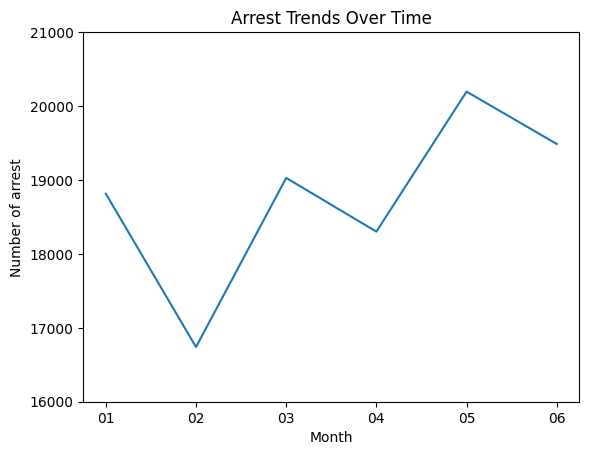

In [10]:
trend_arrest = {}
for i in range(len(df)):
    mon_occur = df['ARREST_DATE'][i].split('/')[0]
    if mon_occur not in trend_arrest.keys():
        trend_arrest[mon_occur] = 0
    else:
        trend_arrest[mon_occur] +=1
trend_arrest_key = list(trend_arrest.keys())
trend_arrest_key.sort()
trend_arrest = {i: trend_arrest[i] for i in trend_arrest_key}

plt.plot(trend_arrest.keys(), trend_arrest.values())
plt.xlabel('Month')
plt.ylabel('Number of arrest')
plt.title('Arrest Trends Over Time')
plt.ylim((16000, 21000))
plt.show()

Comment here

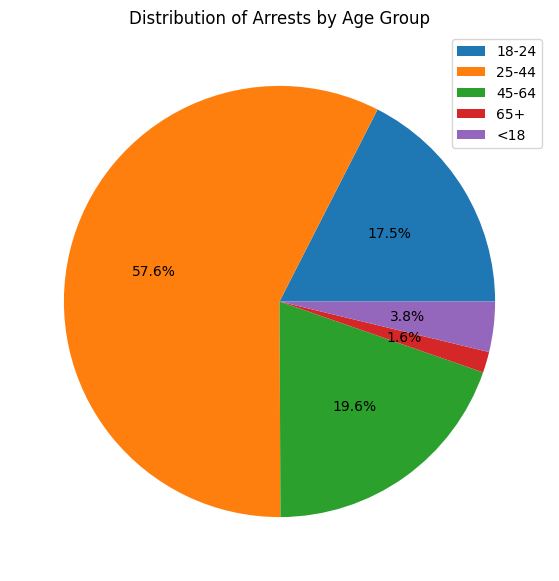

In [11]:
trend_age_group = {}
for i in range(len(df)):
    mon_occur = df['AGE_GROUP'][i]
    if mon_occur not in trend_age_group.keys():
        trend_age_group[mon_occur] = 0
    else:
        trend_age_group[mon_occur] +=1
trend_age_key = list(trend_age_group.keys())
trend_age_key.sort()
trend_age_group = {i: trend_age_group[i] for i in trend_age_key}

plt.figure(figsize=(10, 7))
plt.pie(trend_age_group.values(), autopct='%1.1f%%') 
plt.legend(trend_age_group.keys(), loc='upper right', bbox_to_anchor=(1, 1), fontsize="medium")
plt.title('Distribution of Arrests by Age Group')
plt.show()

Comment here

In [12]:
df.head(10)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,263238742,02/08/2023,380.0,"ROBBERY,CAR JACKING",105.0,ROBBERY,PL 1601003,F,K,62,0,25-44,F,WHITE,989904,156928,40.597407,-73.979638,POINT (-73.979638 40.597407)
1,265590985,03/24/2023,155.0,RAPE 2,104.0,RAPE,PL 1303001,F,S,120,0,18-24,M,BLACK,962873,174172,40.644721,-74.077033,POINT (-74.0770327198983 40.6447209438691)
2,265798132,03/28/2023,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,S,120,0,25-44,M,BLACK,962873,174172,40.644721,-74.077033,POINT (-74.0770327198983 40.6447209438691)
3,269233687,06/02/2023,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,110,0,25-44,M,WHITE HISPANIC,1019164,210169,40.743481,-73.874004,POINT (-73.8740035373971 40.7434812638841)
4,270519574,06/28/2023,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,0,25-44,M,BLACK HISPANIC,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238)
5,261548646,01/07/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,30,0,25-44,M,BLACK,1000749,241092,40.828405,-73.940382,POINT (-73.940382 40.828405)
6,261926460,01/14/2023,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,K,63,0,25-44,M,BLACK,1000520,168264,40.628508,-73.941384,POINT (-73.941384 40.628508)
7,262020709,01/17/2023,NaN,(null),NaN,(null),CPL5700600,9,Q,102,0,25-44,M,BLACK,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)
8,262853818,02/01/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1008754,238895,40.822355,-73.911463,POINT (-73.911463 40.822355)
9,263314679,02/09/2023,NaN,(null),NaN,(null),CPL5700600,9,Q,102,0,25-44,F,BLACK,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)


Some unique values

In [13]:
for col in df.columns:
    print(f"Number of unique values in column {col}:  {len(df[col].unique())}")

Number of unique values in column ARREST_KEY:  112571
Number of unique values in column ARREST_DATE:  181
Number of unique values in column PD_CD:  244
Number of unique values in column PD_DESC:  233
Number of unique values in column KY_CD:  67
Number of unique values in column OFNS_DESC:  63
Number of unique values in column LAW_CODE:  923
Number of unique values in column LAW_CAT_CD:  6
Number of unique values in column ARREST_BORO:  5
Number of unique values in column ARREST_PRECINCT:  77
Number of unique values in column JURISDICTION_CODE:  22
Number of unique values in column AGE_GROUP:  5
Number of unique values in column PERP_SEX:  3
Number of unique values in column PERP_RACE:  7
Number of unique values in column X_COORD_CD:  22160
Number of unique values in column Y_COORD_CD:  23202
Number of unique values in column Latitude:  26457
Number of unique values in column Longitude:  26469
Number of unique values in column New Georeferenced Column:  26963


Heat map (for numerical cols only)

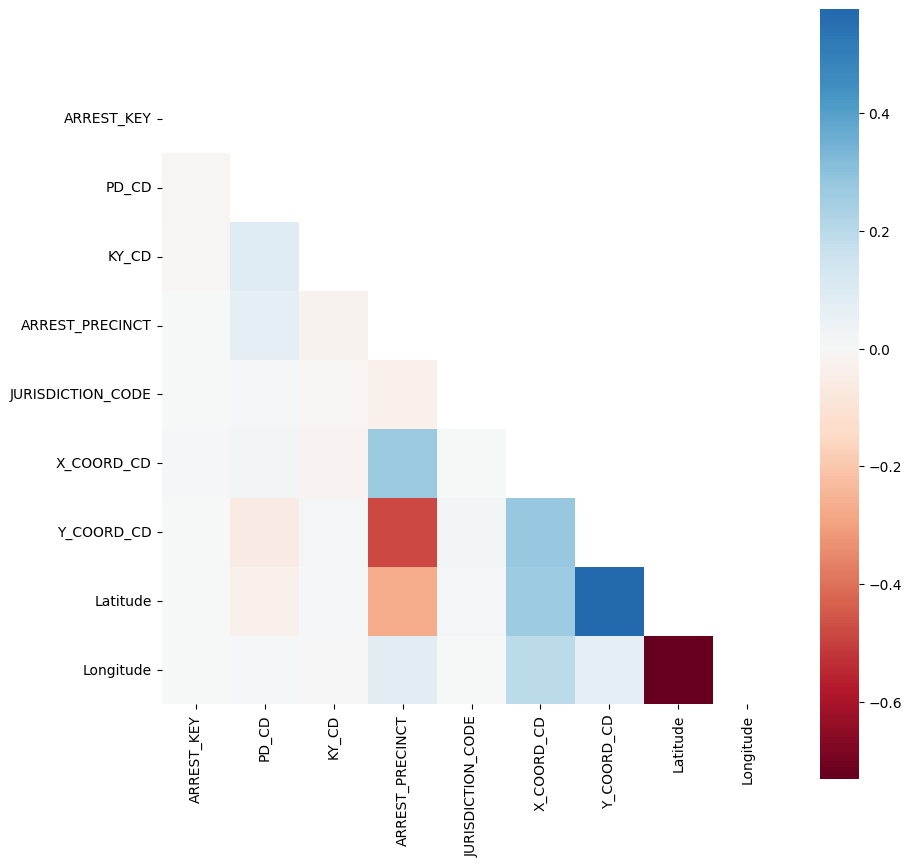

In [14]:
df_copy = df.select_dtypes('number')
corr = df_copy.corr()
matrix = np.triu(corr)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, cmap='RdBu', center=0,ax=ax, square=True, mask=matrix)
plt.show()

# 4. Asking meaningful question <a class="anchor" id="cc4"></a>

### Question 1: What type of arrest do different races often commit?
- **Benefit of finding the answer:** Helping us to define which group fo race commit most of arrest, thus, the authorities will issue some laws or remedies to address.

### Question 2: What crimes do different age group often commit, and level of it? 
- **Benefit of finding the answer:** Helping us to define which group fo age commit most of arrest, and which type of arrest they commit most. Hence, the government will find solutions to solve it (raise public awareness, focus more on education system).

### Question 3: Can the occurrence of crime be influenced by the time factor?
- **Benefit of finding the answer:** Determining the correlation between time and crime helps optimize resource allocation for law enforcement, implement targeted preventive measures, inform policy development, enhance public safety through awareness, and support the development of predictive policing models..

### Question 4: What is the crime situation in different area of New York?
- **Benefit of finding the answer:** New York is divided into 5 boroughs (Manhattan, Bronx, Queens, Staten Island, Brooklyn) so answering the question will help us identify variations in crime across different New York areas then inform targeted interventions, community engagement, policy adjustments, efficient resource allocation, and public awareness for enhanced safety..

# 5. Preprocessing + anlyzing data to answer each question <a class="anchor" id="cc5"></a>

## Question 1: What type of arrest do different races often commit? <a class="anchor" id="q1"></a>

### 1.1 Total arrests for each race

We now plot the data for total arrest for each race

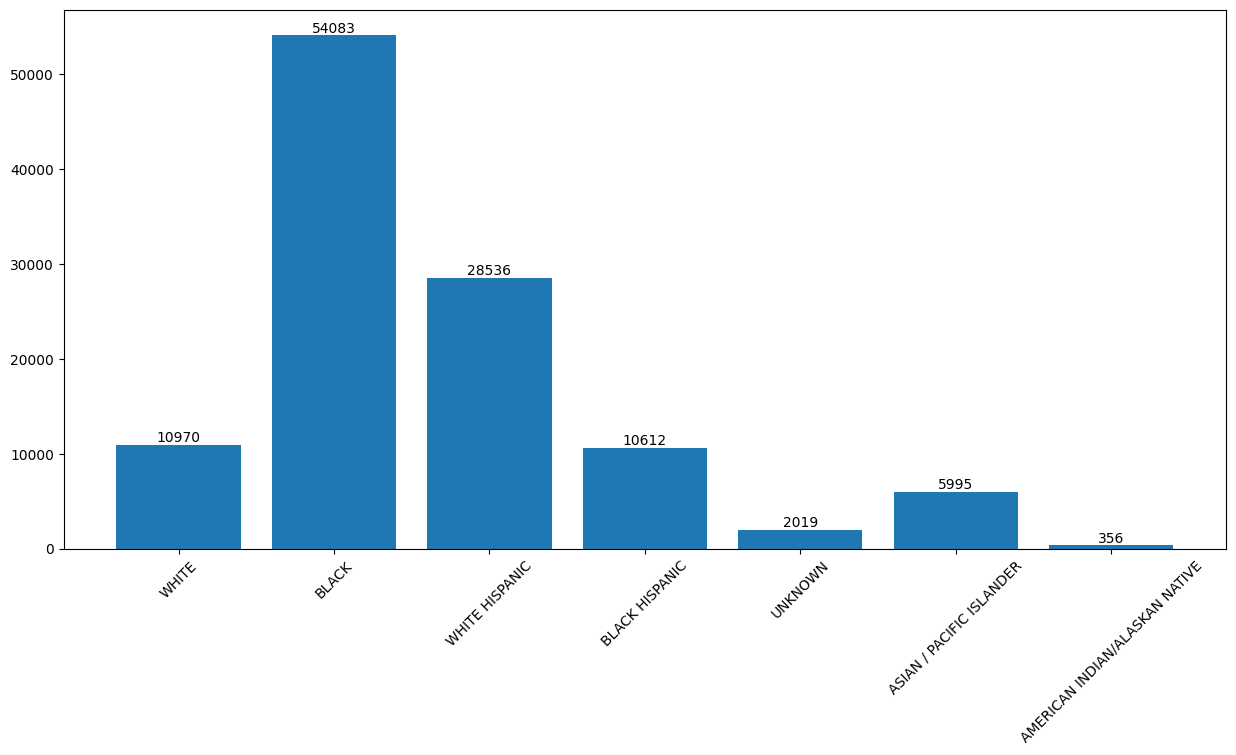

In [15]:
df_race = df.groupby('PERP_RACE')
race_dict = {}
for race in df['PERP_RACE'].unique():
    race_dict[race] = df_race.get_group(race)

plt.figure(figsize=(15, 7))
bar = plt.bar(race_dict.keys(), [len(race_dict[race]) for race in race_dict.keys()])
plt.bar_label(bar)
plt.xticks(rotation = 45)
plt.show()

### 1.2 Highest frequency 

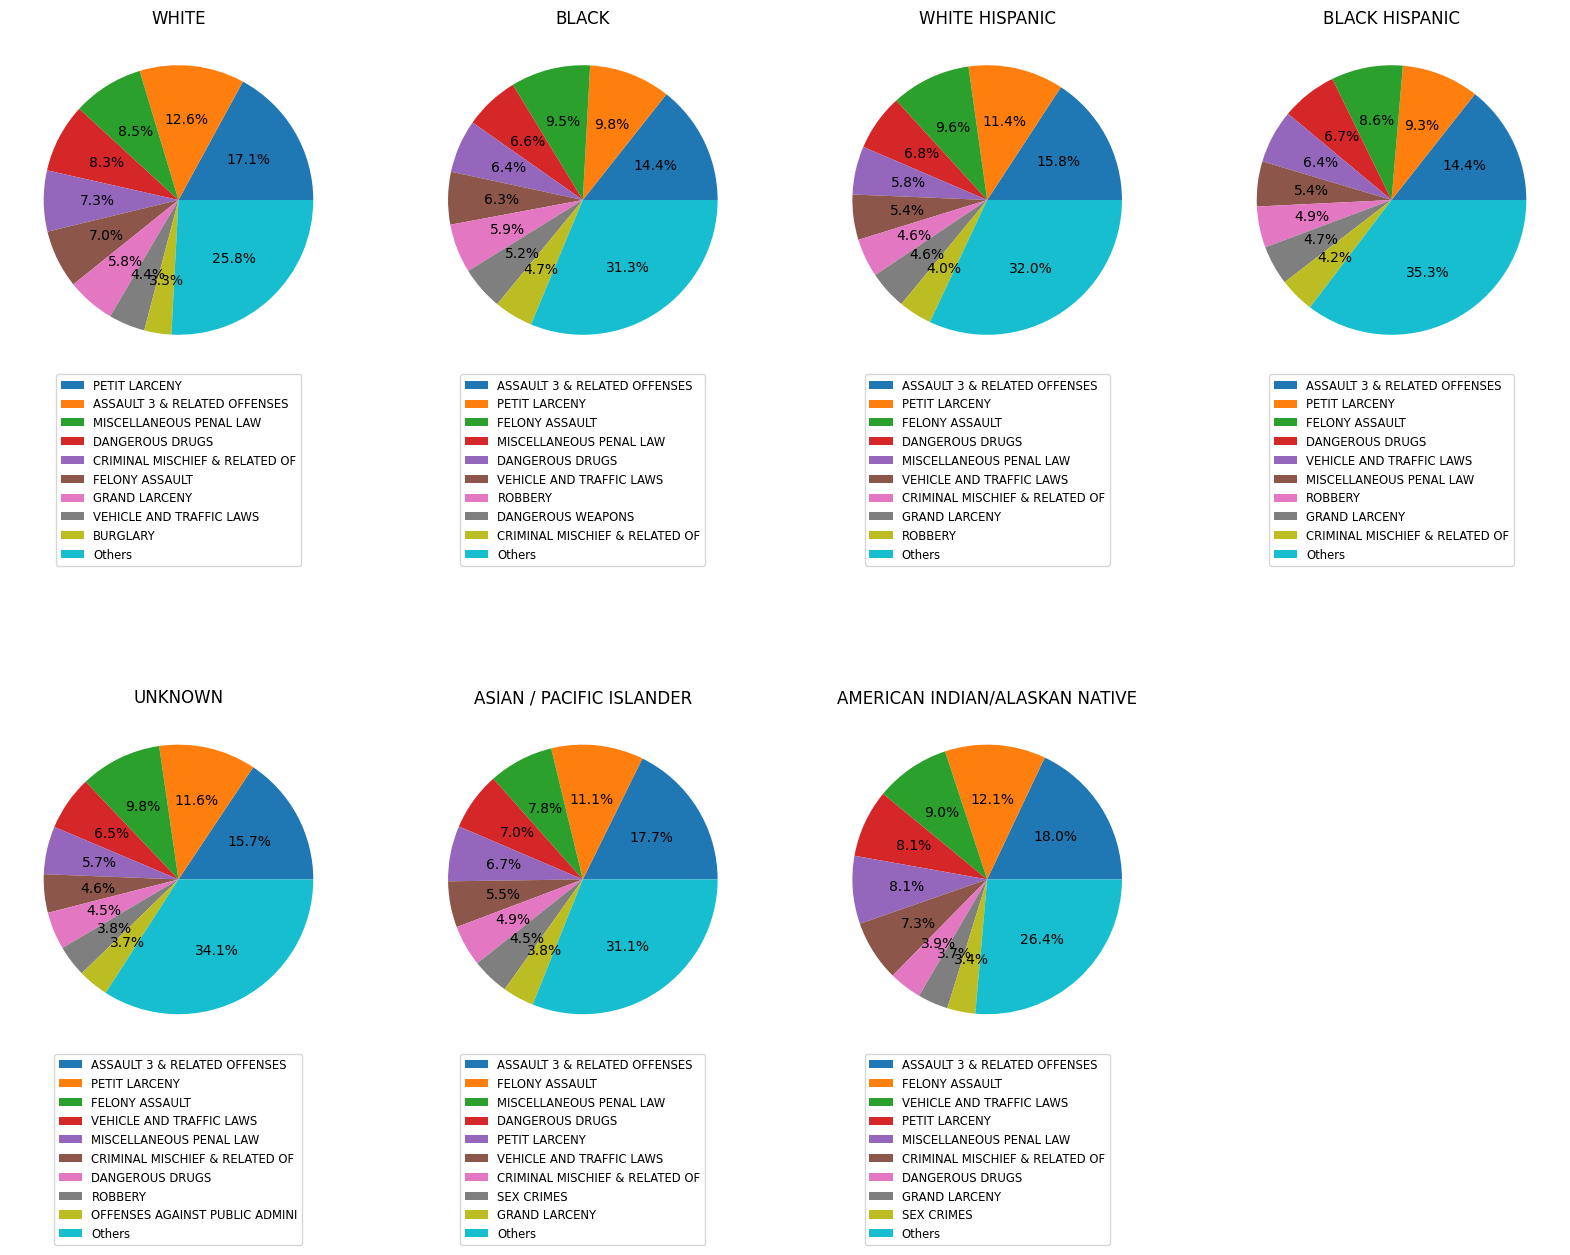

In [16]:
plt.figure(figsize=(20, 25))
for i, race in enumerate(race_dict.keys()):
    each_arrest_list = {}
    value_counts = race_dict[race]['OFNS_DESC'].value_counts()

    top = 9
    for tier in range(top):
        each_arrest_list[value_counts.keys()[tier]] = value_counts.iloc[tier]
    
    each_arrest_list['Others'] = sum(value_counts.iloc[top:]) 
    plt.subplot(3, 4, i + 1)
    plt.pie(each_arrest_list.values(), autopct='%1.1f%%') 

    plt.legend(each_arrest_list.keys(), loc='upper center', bbox_to_anchor=(0.5, 0), fontsize="small")
    plt.title(race)

To be specific

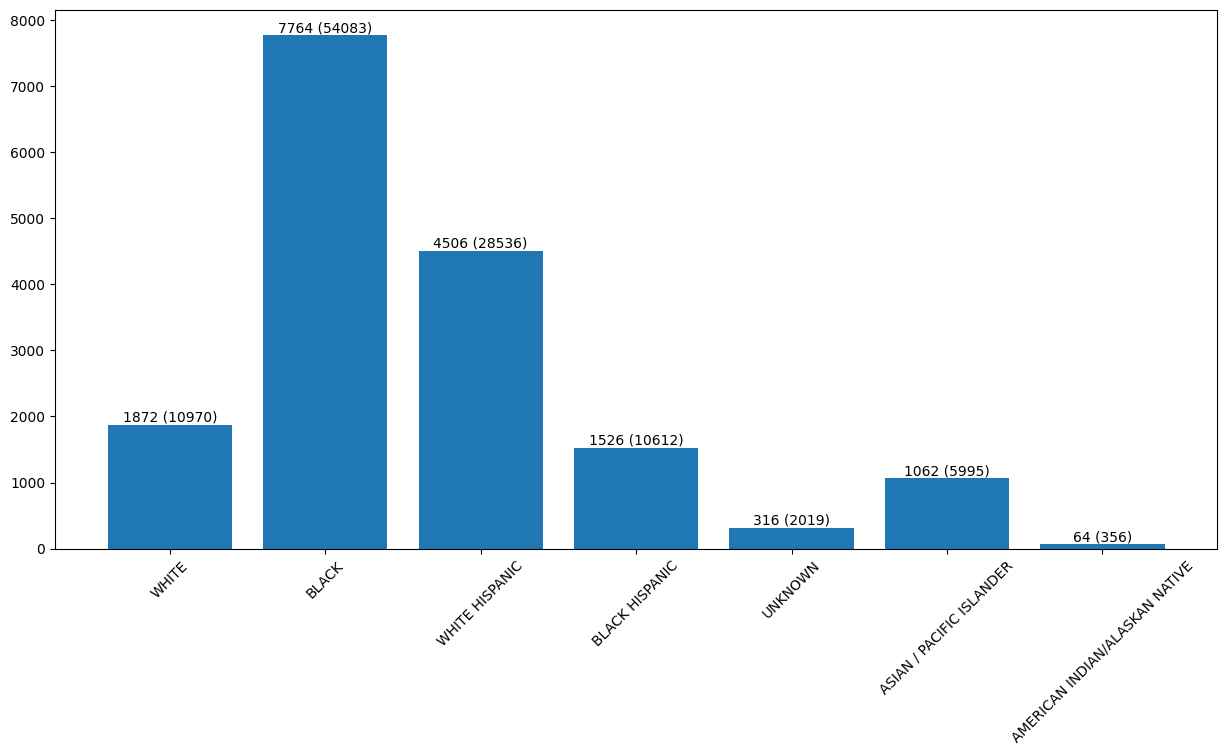

In [17]:
fig, ax = plt.subplots(figsize=(15, 7))
bar = ax.bar(race_dict.keys(), [race_dict[race]['OFNS_DESC'].value_counts().iloc[0] for race in race_dict.keys()])
x_labels = [str(round(race_dict[race]['OFNS_DESC'].value_counts().iloc[0])) + ' (' + 
            str(len(race_dict[race])) + ')' for race in race_dict.keys()]
x_labels
rects = ax.patches

for rect, label in zip(rects, x_labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.xticks(rotation = 45)
plt.show()

### Conclusion:
- Overall, almost races often commit "Assault 3 & related offenses" except for White. 


## Question 2: What sins do different age group often commit, and level of it? <a class="anchor" id="q2"></a>

Also, we will plot that of age group

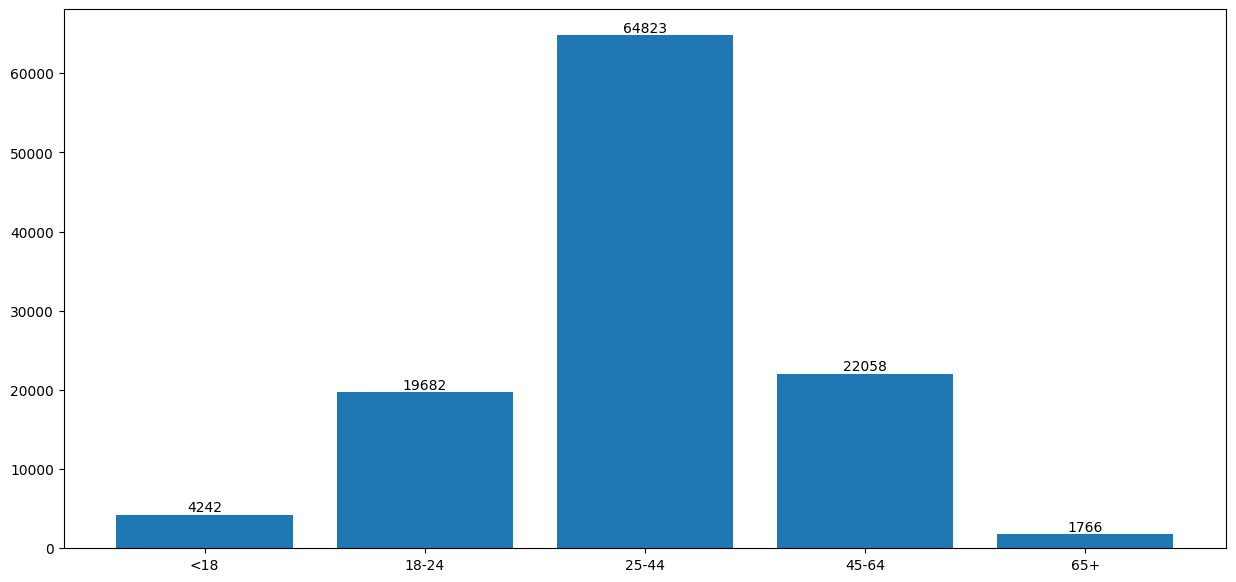

In [18]:
df_age = df.groupby('AGE_GROUP')
age_dict = {}
for race in df['AGE_GROUP'].unique():
    age_dict[race] = df_age.get_group(race)

age_key = list(age_dict.keys())
age_key.sort()
age_dict = {i: age_dict[i] for i in age_key}

key = list(age_dict.keys())[-1]

value = age_dict.pop(key)
age_dict = {key: value, **age_dict}

plt.figure(figsize=(15, 7))
bar = plt.bar(age_dict.keys(), [len(age_dict[race]) for race in age_dict.keys()])
plt.bar_label(bar)
plt.show()

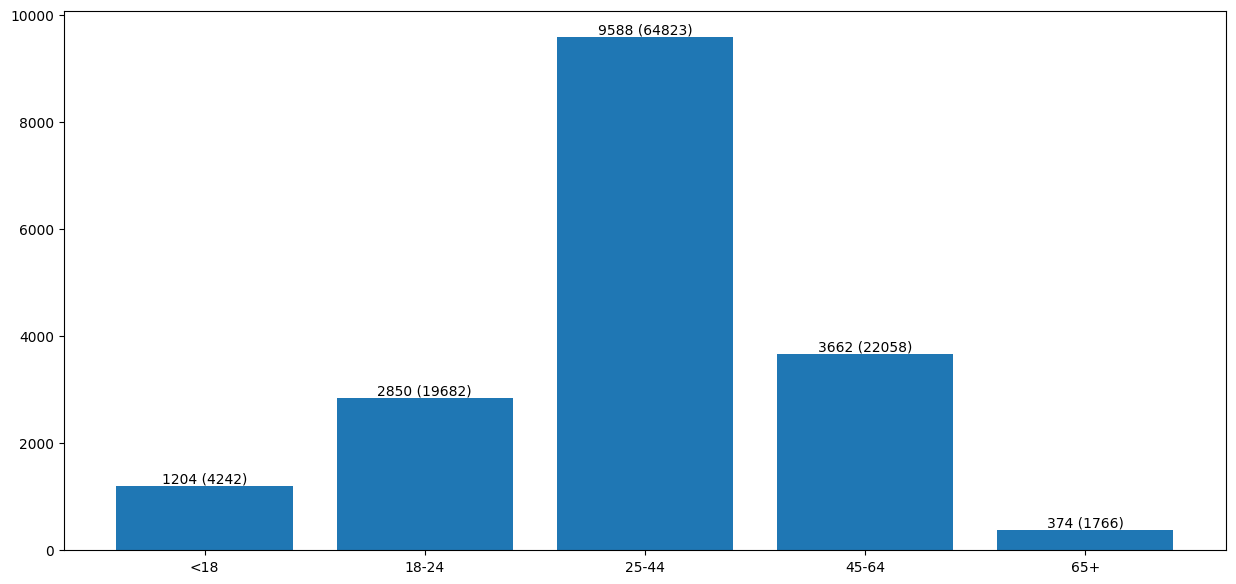

In [19]:
fig, ax = plt.subplots(figsize=(15, 7))
bar = ax.bar(age_dict.keys(), [age_dict[race]['OFNS_DESC'].value_counts().iloc[0] for race in age_dict.keys()])
x_labels = [str(round(age_dict[race]['OFNS_DESC'].value_counts().iloc[0])) + ' (' + 
            str(len(age_dict[race])) + ')' for race in age_dict.keys()]
x_labels
rects = ax.patches

for rect, label in zip(rects, x_labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

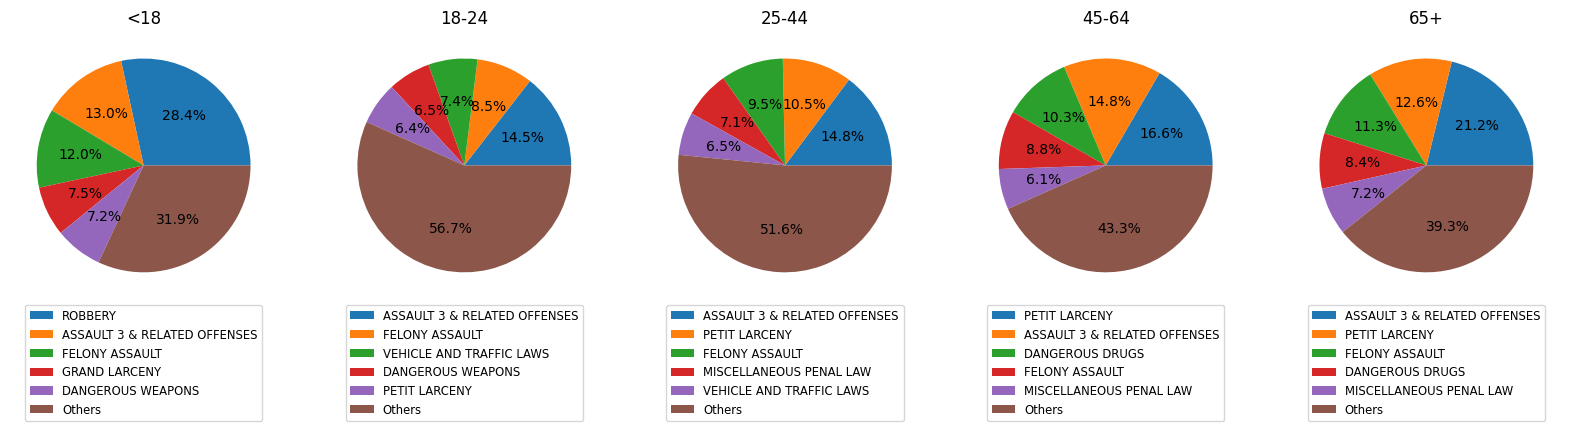

In [20]:
plt.figure(figsize=(20, 25))
for i, race in enumerate(age_dict.keys()):
    each_arrest_list = {}
    value_counts = age_dict[race]['OFNS_DESC'].value_counts()

    top = 5
    for tier in range(top):
        each_arrest_list[value_counts.keys()[tier]] = value_counts.iloc[tier]
    
    each_arrest_list['Others'] = sum(value_counts.iloc[top:]) 
    plt.subplot(1, 5, i + 1)
    plt.pie(each_arrest_list.values(), autopct='%1.1f%%') 

    plt.legend(each_arrest_list.keys(), loc='upper center', bbox_to_anchor=(0.5, 0), fontsize="small")
    plt.title(race)

Next, the level of arrests need to be considered

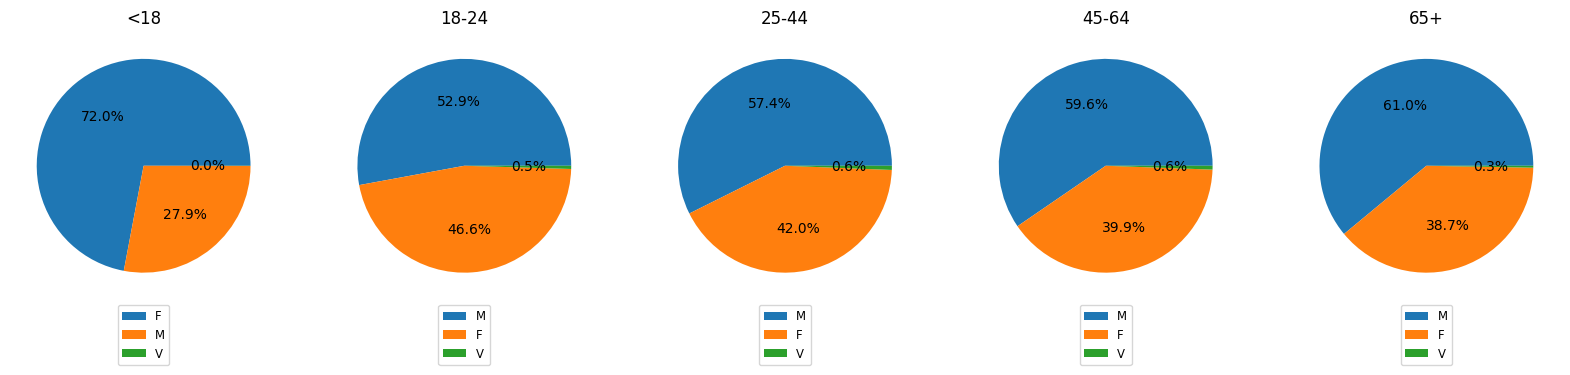

In [21]:
plt.figure(figsize=(20, 25))
for i, age in enumerate(age_dict.keys()):

    value_counts = age_dict[age]['LAW_CAT_CD'].value_counts()
    value_counts = value_counts.drop(['9', 'I'], errors='ignore')
    plt.subplot(1, 5, i + 1)
    plt.pie(value_counts, autopct='%1.1f%%') 

    plt.legend(value_counts.keys(), loc='upper center', bbox_to_anchor=(0.5, 0), fontsize="small")
    plt.title(age)

### Observation:
- Overall, almost age groups commit roughly 55.5% felony level, 44% misdemeanor level and 0.5% violation one.
- However, in under-18-year-old group, they commit 72% felony level arrest, which is quite high. In addition, the smallest arrest, violation, witness roughly 0%, with 1 arrest. Thus, we will find the hidden reason why children commit such a huge number of felony like that.

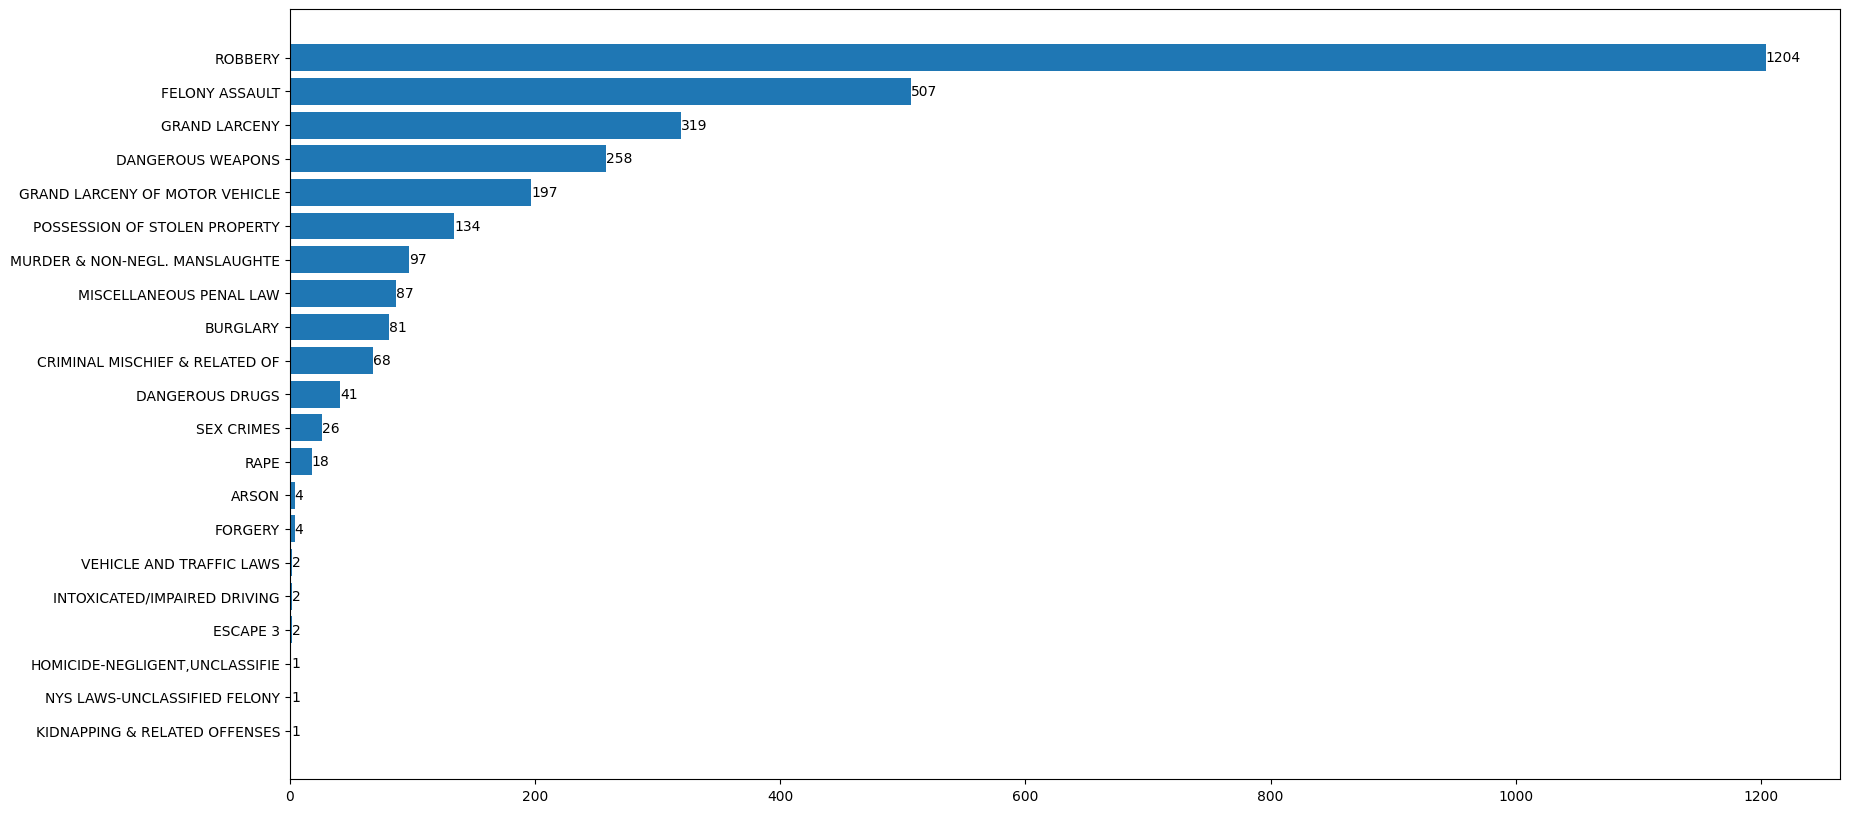

In [22]:
crime_types = list(age_dict['<18'][age_dict['<18']['LAW_CAT_CD'] == 'F']['OFNS_DESC'])
counter = Counter(crime_types)
labels, values = zip(*sorted(counter.items(), key=lambda x: x[1], reverse=False))

plt.figure(figsize=(20, 10))
bar = plt.barh(labels, values)
plt.bar_label(bar)
plt.show()

Trend of children's arrest over time

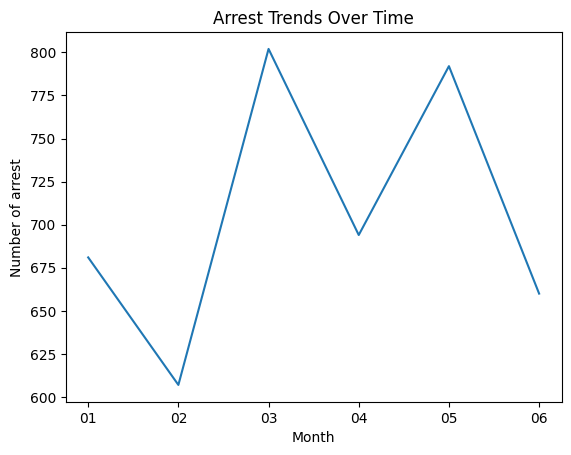

In [23]:
trend_arrest = {}
for i in range(len(age_dict['<18'])):
    mon_occur = age_dict['<18']['ARREST_DATE'].iloc[i].split('/')[0]

    if mon_occur not in trend_arrest.keys():
        trend_arrest[mon_occur] = 0
    else:
        trend_arrest[mon_occur] +=1
trend_arrest_key = list(trend_arrest.keys())
trend_arrest_key.sort()
trend_arrest = {i: trend_arrest[i] for i in trend_arrest_key}

plt.plot(trend_arrest.keys(), trend_arrest.values())
plt.xlabel('Month')
plt.ylabel('Number of arrest')
plt.title('Arrest Trends Over Time')
plt.show()

### Conclusion:
- In this term, the number of children's arrest witness a fluctuation.
- Although they only commit 4242 arrests, second lowest, felony level dominated others.
- To be specific, the data of robbery is 1204, followed by felony assault, which two-folds lower.

## Question 3: Can the occurrence of crime be influenced by the time factor? <a class="anchor" id="q3"></a>

### 3.1 Preprocess data

We changed the date format so we could analyze the data more precisely.
We created 2 other columns 'Month' and 'DayOfWeek' to track the distribution of crimes more clearly.

In [24]:
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'], format='%m/%d/%Y')
df['Month'] = df['ARREST_DATE'].dt.month_name()
df['DayOfWeek'] = df['ARREST_DATE'].dt.day_name()

### 3.2 Analyze Data

The data has only updated to June, we will explore crimes count in each month.

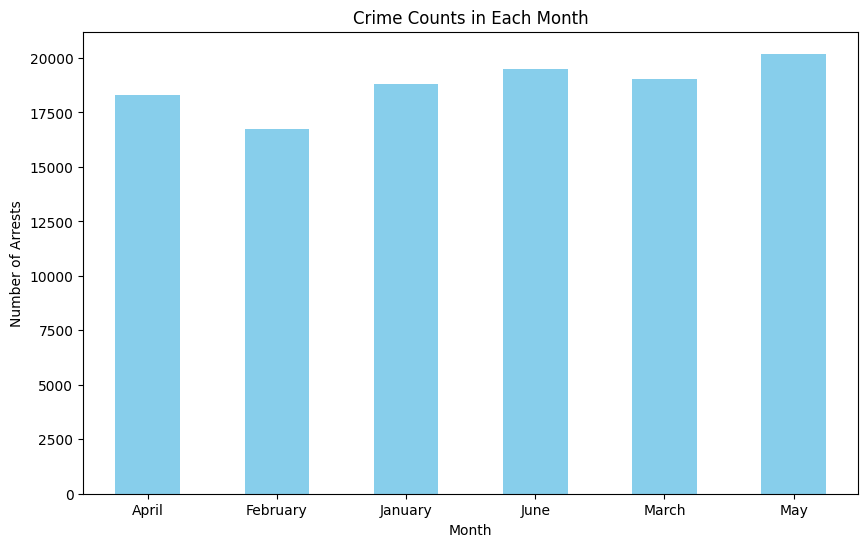

In [25]:
monthly_crime_counts = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
monthly_crime_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Arrests')
plt.title('Crime Counts in Each Month')
plt.xticks(rotation=0)
plt.show()

#### Observation:
- There aren't any difference between the crimes count in each month, February is the lowest maybe because it has the fewest day in month

Next we will explore top 10 crimes in each month.

C:\Users\tttoa\AppData\Local\Temp\ipykernel_1788\538523281.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_crime_counts = df.groupby(['Month', 'OFNS_DESC']).size().reset_index(name='CrimeCount')


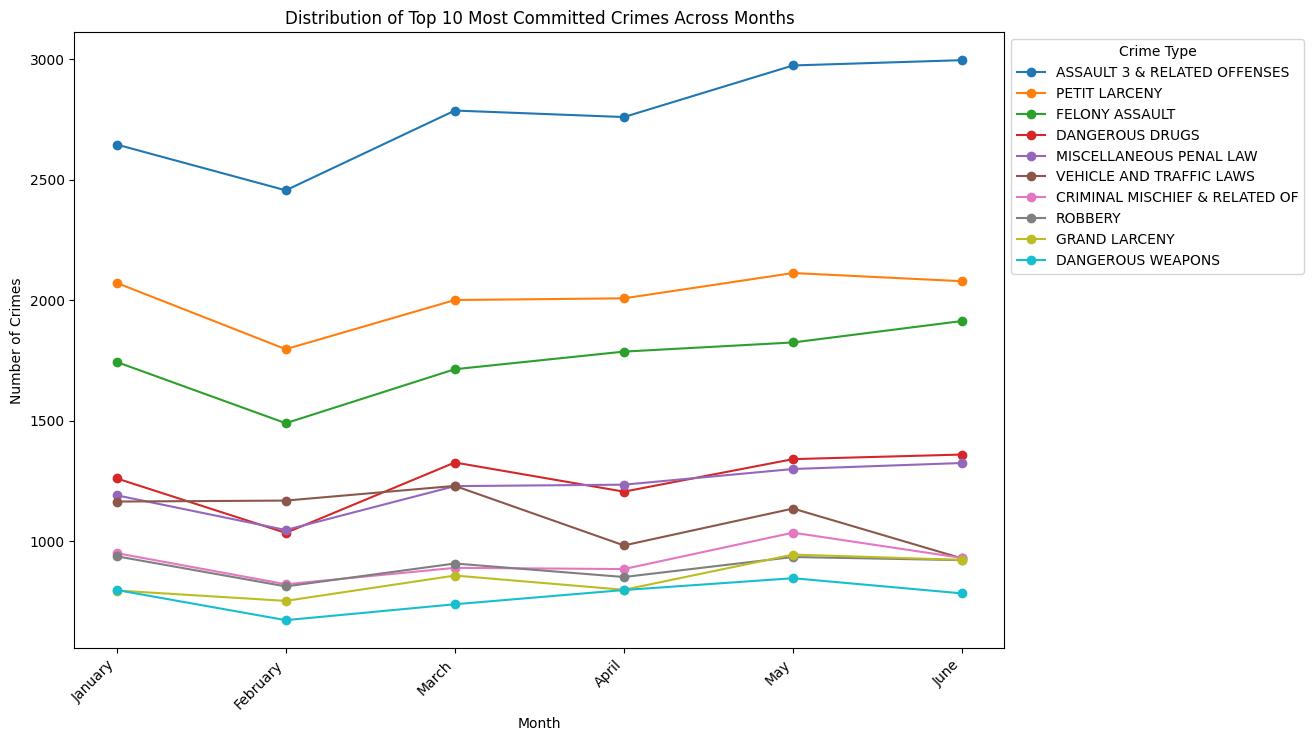

In [26]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June']
df['Month'] = pd.Categorical(df['Month'], categories=months_order, ordered=True)

monthly_crime_counts = df.groupby(['Month', 'OFNS_DESC']).size().reset_index(name='CrimeCount')
monthly_crime_counts.sort_values(['Month', 'CrimeCount'], ascending=[True, False], inplace=True)

top_10_crimes = monthly_crime_counts.groupby('OFNS_DESC')['CrimeCount'].sum().nlargest(10).index
filtered_data = monthly_crime_counts[monthly_crime_counts['OFNS_DESC'].isin(top_10_crimes)]

plt.figure(figsize=(12, 8))

for crime in top_10_crimes:
    crimes_by_month = filtered_data[filtered_data['OFNS_DESC'] == crime]
    plt.plot(crimes_by_month['Month'], crimes_by_month['CrimeCount'], label=crime, marker='o')

plt.title('Distribution of Top 10 Most Committed Crimes Across Months')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Crime Type', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

#### Observation:
- ASSUALT 3 & REALATED OFFENSES is always the highest across 6 months following it are PETIT LARCENY and FELONY ASSAULT.
- Between crimes such as DANGEROUS DRUGS, MISSCELANEOUS PENAL LAW, VEHICLE AND TRAFFIC LAW there is not much consistency over the months.

Next we will see if there is something noteworthy on the crime occurence in the days of week.

C:\Users\tttoa\AppData\Local\Temp\ipykernel_1788\377310413.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_crime_counts = df.groupby(['DayOfWeek', 'OFNS_DESC']).size().reset_index(name='CrimeCount')


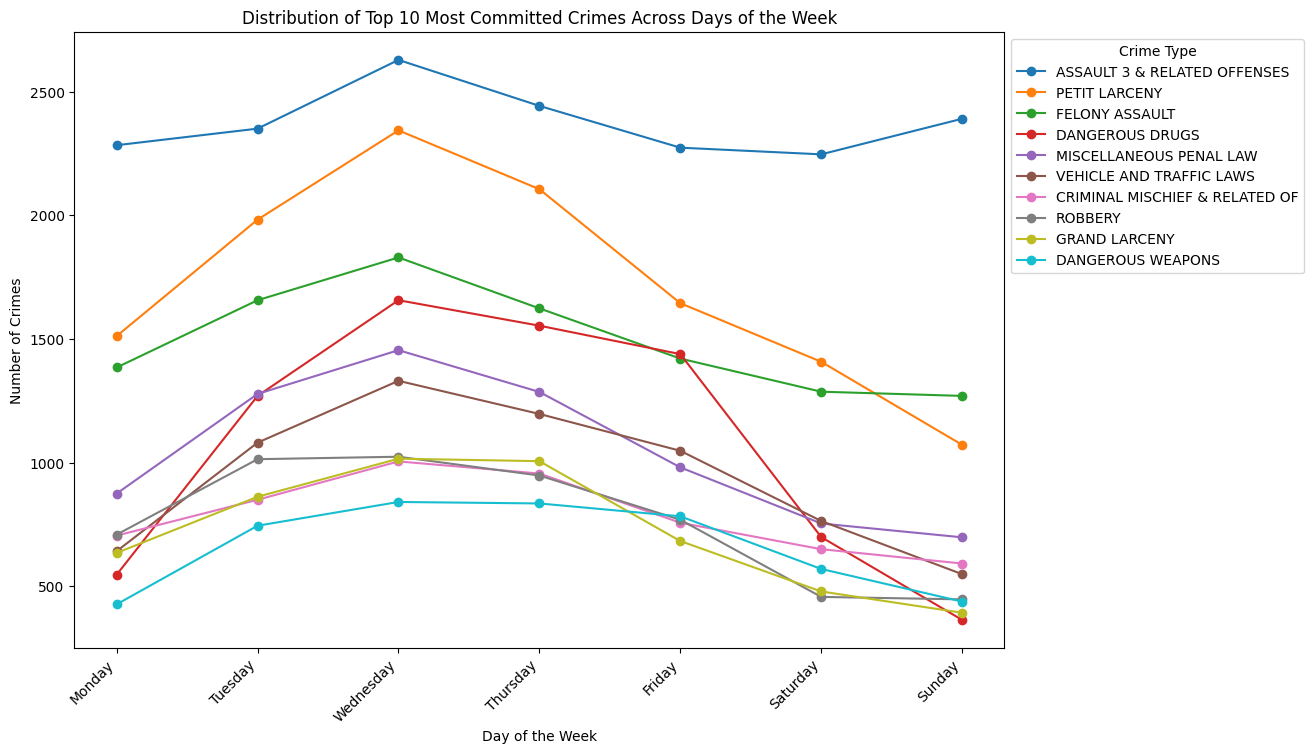

In [27]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=days_order, ordered=True)

weekly_crime_counts = df.groupby(['DayOfWeek', 'OFNS_DESC']).size().reset_index(name='CrimeCount')
weekly_crime_counts.sort_values(['DayOfWeek', 'CrimeCount'], ascending=[True, False], inplace=True)

top_10_crimes = weekly_crime_counts.groupby('OFNS_DESC')['CrimeCount'].sum().nlargest(10).index
filtered_data = weekly_crime_counts[weekly_crime_counts['OFNS_DESC'].isin(top_10_crimes)]

plt.figure(figsize=(12, 8))

for crime in top_10_crimes:
    crimes_by_day = filtered_data[filtered_data['OFNS_DESC'] == crime]
    plt.plot(crimes_by_day['DayOfWeek'], crimes_by_day['CrimeCount'], label=crime, marker='o')

# Adding labels and title
plt.title('Distribution of Top 10 Most Committed Crimes Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Crime Type', bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()

### Observation:
- Wednesday has unusually highest number on any crime in the top 10 committed crimes.
- The number of crimes from Saturday to Monday are suprisingly the lowest.
- Dangerous drugs crime is unusually high during the middle of the week but drops significantly at weekend.

Our group wanted to check if the number of the top 10 crimes also corresponded to the number of crimes in total.

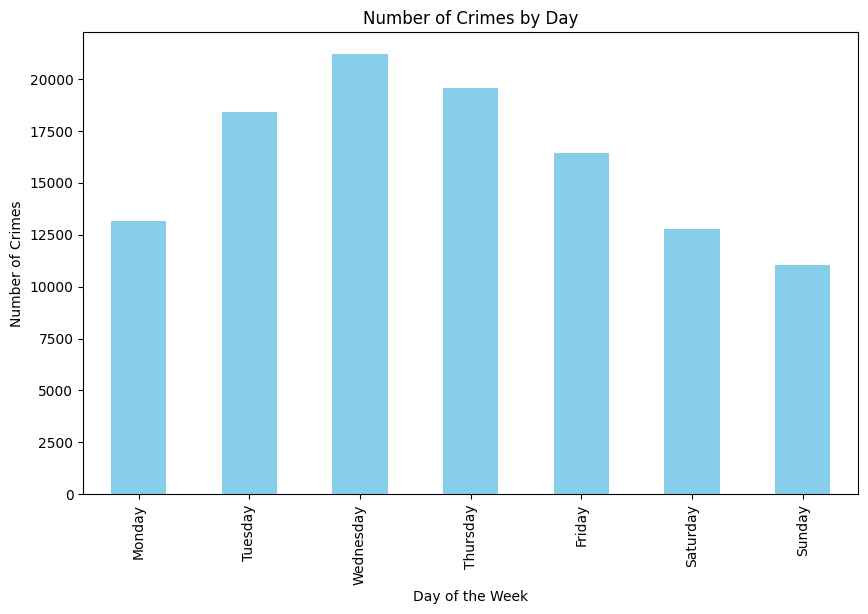

In [28]:
crime_count_byDat = df['DayOfWeek'].value_counts().sort_index()
crime_count_byDat.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Number of Crimes by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()

### Observation:
-  It looks like there are a positive correlation between number of top 10 crimes and number of total crimes through out the week.

### Conclusion:
- ASSAULT & RELATED OFFENSE, PETIT LARCANY and FELONY ASSAULT are 3 of the most committed crimes through out the months.
- On monthly scale there seems to be not much relevance between occurence of crimes and months.
- But specifically in days of week, there are some interesting insgihts. There are a lot more crimes recorded during the weekdays (especially in the middle of the week) than in the weekend. Our group thinks that crime may usually occurs when more people are working and get involved in each other. There is also a possibility that police officers work less at weekend so less criminals are arrested.

## 4 Crime situation across each precinct and borough <a class="anchor" id="q4"></a>
### 4.1 Preprocess data

We renames the value in column 'ARREST_BORO' so it can be easier to grasp the data.

In [29]:
df['ARREST_BORO'] = df['ARREST_BORO'].replace('K', 'Brooklyn')
df['ARREST_BORO'] = df['ARREST_BORO'].replace('B', 'Bronx')
df['ARREST_BORO'] = df['ARREST_BORO'].replace('M', 'Manhattan')
df['ARREST_BORO'] = df['ARREST_BORO'].replace('Q', 'Queens')
df['ARREST_BORO'] = df['ARREST_BORO'].replace('S', 'Staten Island')

#### 4.2 Analyze data

New York is divided into 5 boroughs which are Brooklyn, Queens, Staten Island and Manhattan. We will visualize each area so we can see more clearly.

C:\Users\tttoa\AppData\Local\Temp\ipykernel_1788\2777581632.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  gdf_ny = gpd.read_file(gpd.datasets.get_path('nybb'))


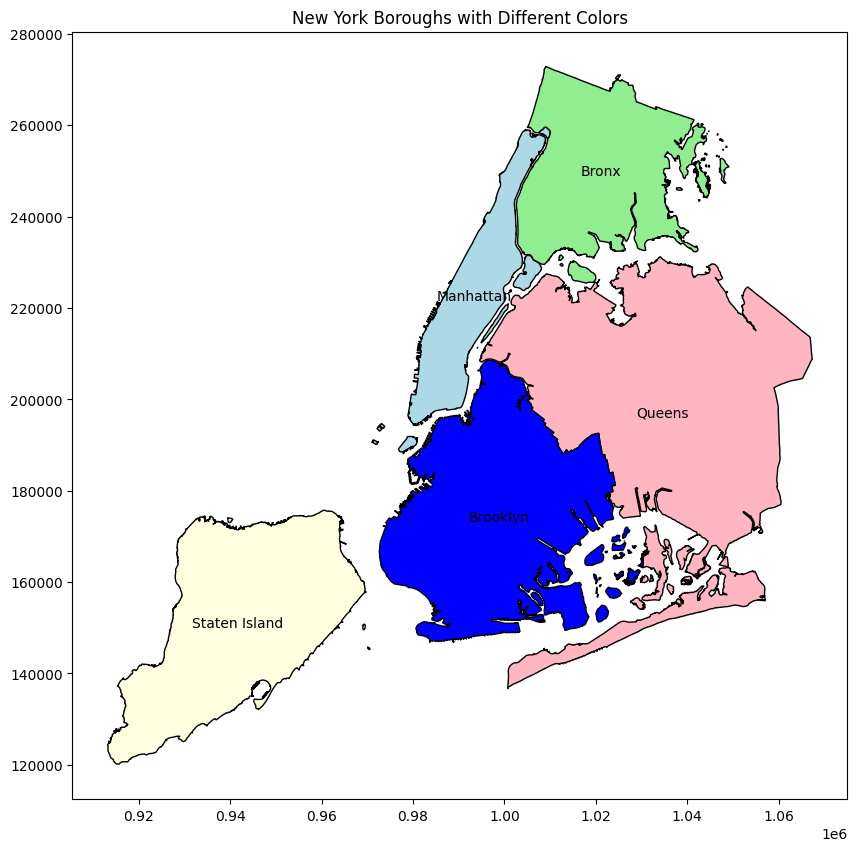

In [30]:
gdf_ny = gpd.read_file(gpd.datasets.get_path('nybb'))

colors = {'Manhattan': 'lightblue', 'Bronx': 'lightgreen', 'Brooklyn': 'blue', 'Staten Island': 'lightyellow', 'Queens': 'lightpink'}

ax = gdf_ny.plot(edgecolor='black', figsize=(10, 10), color=[colors[boro] for boro in gdf_ny['BoroName']])

for x, y, label in zip(gdf_ny.geometry.centroid.x, gdf_ny.geometry.centroid.y, gdf_ny['BoroName']):
    ax.text(x, y, label, fontsize=10, ha='center', va='center')

plt.title('New York Boroughs with Different Colors')
plt.show()

Next we will calculate total crime in each borough.

C:\Users\tttoa\AppData\Local\Temp\ipykernel_1788\1305478902.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  gdf_ny = gpd.read_file(gpd.datasets.get_path('nybb'))


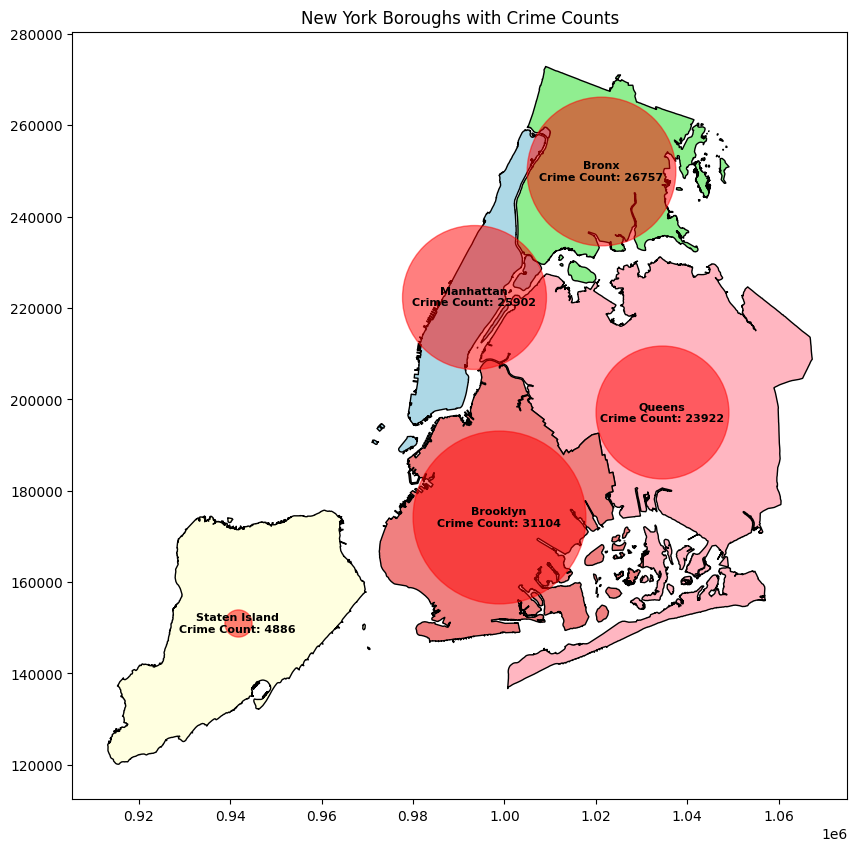

In [31]:
gdf_ny = gpd.read_file(gpd.datasets.get_path('nybb'))
crime_count_borough = df['ARREST_BORO'].value_counts()
crime_count_borough_dict = crime_count_borough.to_dict()

colors = {'Manhattan': 'lightblue', 'Bronx': 'lightgreen', 'Brooklyn': 'lightcoral', 'Staten Island': 'lightyellow', 'Queens': 'lightpink'}
ax = gdf_ny.plot(edgecolor='black', figsize=(10, 10), color=[colors[boro] for boro in gdf_ny['BoroName']])

for boro, count in crime_count_borough_dict.items():
    boro_geometry = gdf_ny[gdf_ny['BoroName'] == boro].geometry.centroid.iloc[0]
    ax.plot(boro_geometry.x, boro_geometry.y, 'o', color='red', markersize=count * 0.004, alpha=0.5)
    ax.text(boro_geometry.x, boro_geometry.y, f'{boro}\nCrime Count: {count}', fontsize=8, ha='center', va='center', fontweight='bold')

plt.title('New York Boroughs with Crime Counts')
plt.show()

### Observation:
- Except for the Staten Island that has significantly the lowest crime counts comparing to other areas, other borroughs have relatively similar numbers with Brooklyn at the highest with 31104 crimes recorded.

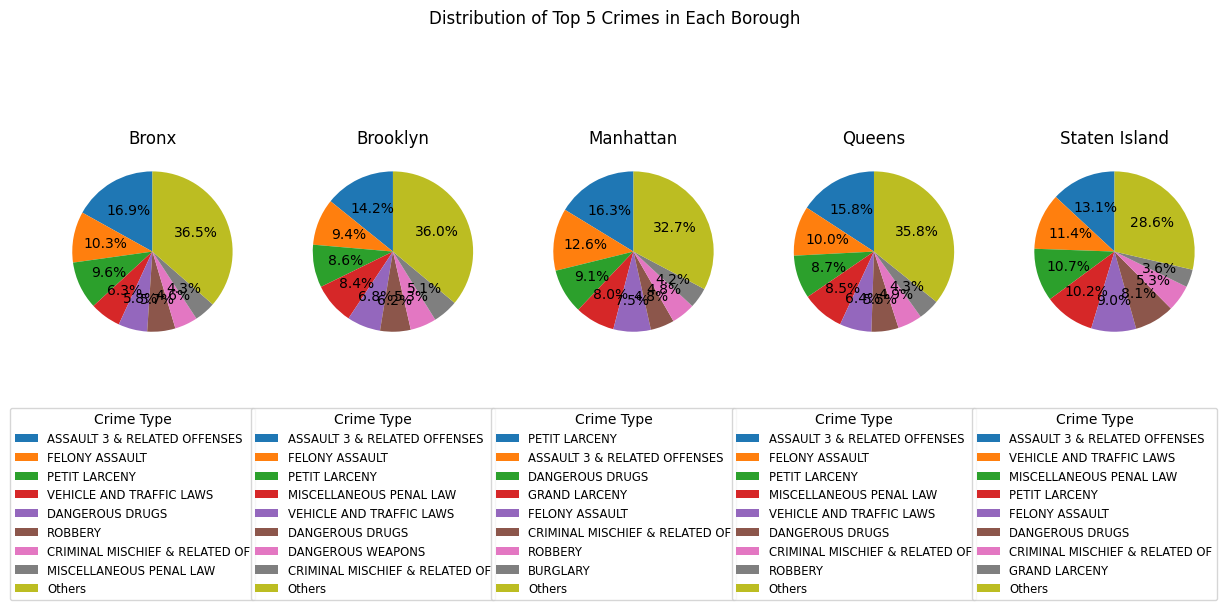

In [32]:
crimes_in_boro = df.groupby(['ARREST_BORO', 'OFNS_DESC']).size().unstack(fill_value=0)

fig, axes = plt.subplots(nrows=1, ncols=len(crimes_in_boro), figsize=(15, 5))

for i, (boro, crime_counts_boro) in enumerate(crimes_in_boro.iterrows()):
    top8_crimes = crime_counts_boro.nlargest(8)
    other_crimes = crime_counts_boro.drop(top8_crimes.index).sum()
    top8_crimes['Others'] = other_crimes
    
    wedges, texts, autotexts = axes[i].pie(top8_crimes, labels=None, autopct='%1.1f%%', startangle=90 )
    axes[i].set_title(boro)

    legend_labels = top8_crimes.index.tolist()
    legend_labels[-1] = 'Others'
    axes[i].legend( legend_labels, title='Crime Type', loc='upper center', bbox_to_anchor=(0.4, -0.25), fontsize='small')


plt.suptitle('Distribution of Top 5 Crimes in Each Borough')
plt.show()

### Observation:
- ASSAULT & RELATED OFFENSES is committed the most in most boroughs except for in Manhattan.
- DANGEROUS DRUG rate is significantly higher in Manhattan than in other areas.

In [33]:
precincts_by_borough = df.groupby('ARREST_BORO')['ARREST_PRECINCT'].unique().to_dict()

for borough, precincts in precincts_by_borough.items():
    print(f"{borough} Borough Precincts: {precincts}")

Bronx Borough Precincts: [42 47 48 52 45 43 41 46 44 49 50 40]
Brooklyn Borough Precincts: [62 84 63 77 75 60 68 73 81 90 78 69 83 76 61 66 70 71 88 67 72 94 79]
Manhattan Borough Precincts: [ 30  19  13  32   5  34   6  28  18   1  26  25  23 114  24   9  14   7
  10  17  20  33  22]
Queens Borough Precincts: [110 102 103 112 109 113 114 105 101 100 108 106 104 111 115 107]
Staten Island Borough Precincts: [120 122 123 121]


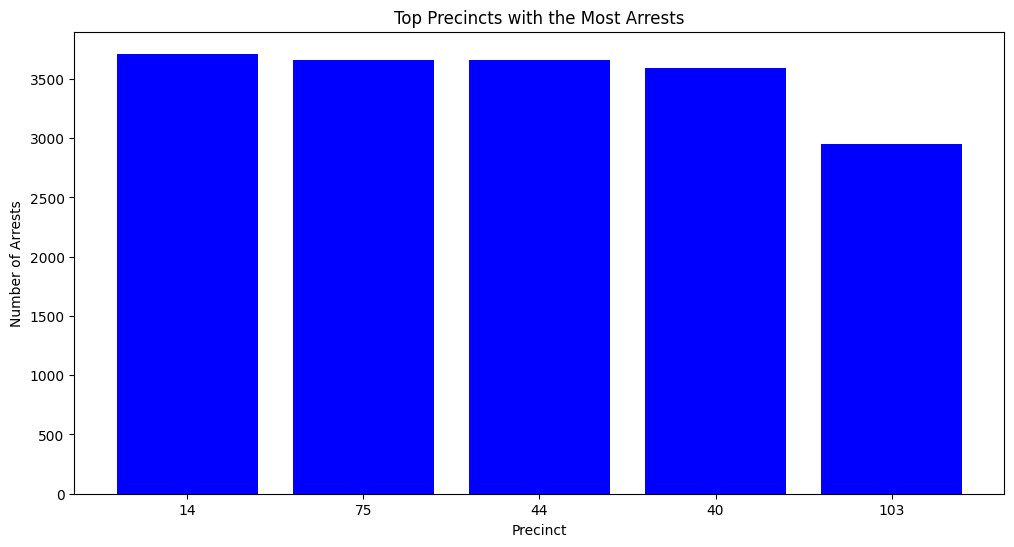

In [39]:
precinct_arrests = df['ARREST_PRECINCT'].value_counts().reset_index(name='ArrestCount')

top_precincts = precinct_arrests.sort_values(by='ArrestCount', ascending=False).head(5)

plt.figure(figsize=(12, 6))
plt.bar(top_precincts['index'].astype(str), top_precincts['ArrestCount'], color='blue')
plt.title('Top Precincts with the Most Arrests')
plt.xlabel('Precinct')
plt.ylabel('Number of Arrests')

plt.show()

### Observation:
- Precinct 14 is in Manhattan, precinct 75 is in Brooklyn, precinct 44 and 40 are in Bronx and precinct 103 is in Queens.
- Each borough seem to have an area where crimes are amassed.
- The numbers of crimes of top 4 precincts with most crimes seem to be relatively similar.

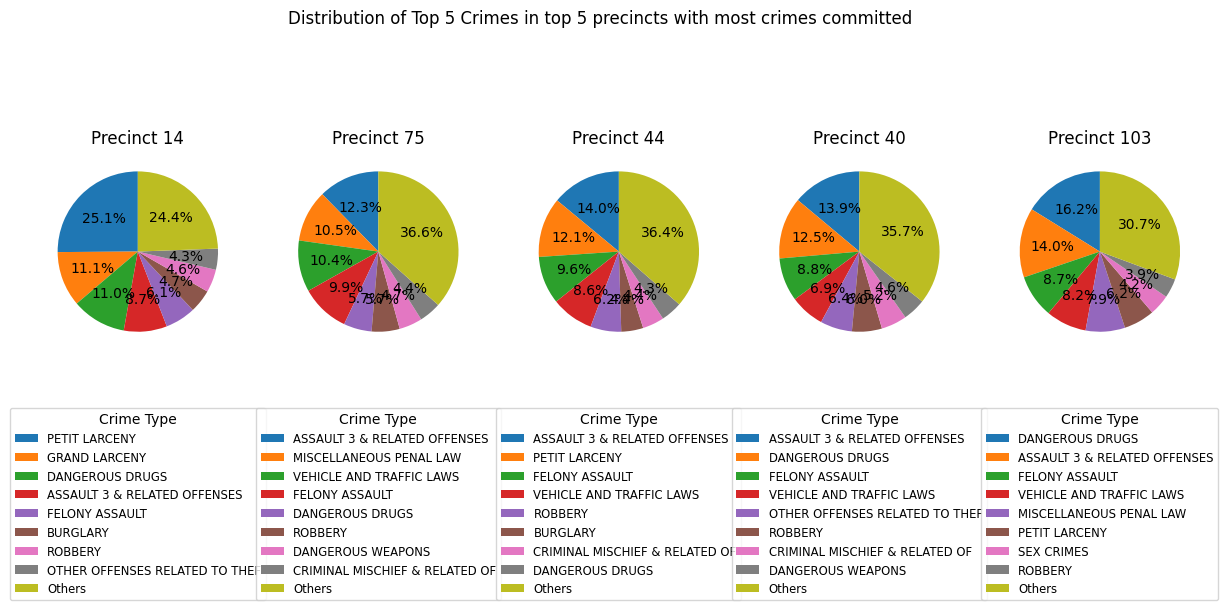

In [35]:
crime_count_precinct = df.groupby(['ARREST_PRECINCT', 'OFNS_DESC']).size().unstack(fill_value=0)
top5_precincts = df['ARREST_PRECINCT'].value_counts().nlargest(5).index
fig, axes = plt.subplots(nrows=1, ncols=len(top5_precincts), figsize=(15, 5))

for i, precinct in enumerate(top5_precincts):
    top8_crimes = crime_count_precinct.loc[precinct].nlargest(8)
    other_crimes_precinct = crime_count_precinct.loc[precinct].drop(top8_crimes.index).sum()
    top8_crimes['Others'] = other_crimes_precinct
    
    wedges, texts, autotexts = axes[i].pie(top8_crimes, labels=None, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Precinct {precinct}')

    legend_labels = top8_crimes.index.tolist()
    legend_labels[-1] = 'Others'
    axes[i].legend(legend_labels, title='Crime Type', loc='upper center', bbox_to_anchor=(0.5, -0.25), fontsize='small')

plt.suptitle('Distribution of Top 5 Crimes in top 5 precincts with most crimes committed')
plt.show()

### Observation:
- ASSAULT 3 & RELATED OFFENSES is top most committed crimes in precinct precinct 75, 44, 40 and second in precint 103.
- PETIT LARCENY rate is suprisingly the highest in precinct 14 and DANGEROUS DRUGS rate is the highest in precinct 103.
### Conclusion:
- Every borough except for Staten Island has an area that most crimes occured in it.
- PETIT LARCENY rate is the largest in Manhattan, in other boroughs the crime that has the highest rate is ASSAULT 3 & RELATED OFFENSES.
- DANGEROUS DRUGS is the most recorded offense in precinct 103 but its rate overall in Queens isn't that high, so the area in precinct 103 may be the hot spot for drugs dealing.

# 6. Reflection <a class="anchor" id="cc6"></a>

### Trần Thái Toàn

**What difficulties have you encountered?**
From my perspective, this data set is quite hard for exploration becasue the features are not related, just a record dataset. Thus, the number of question is small and the plot looks simple. However, we still found 4 meaningful questions for this dataset.

**What have your learned?**
Initially, the way to cope with "hard" dataset. Additionally, teamwork and discussing. Finally, course-related knowledge such as plotting, using git, working with Linux.
### Trương Công Gia Phát

**What difficulties have you encountered?** 
This dataset in my opinion is easy to understand what it's about but yet so hard to understand it completely. Proposing a question worth exploring was a challenge for me. Even after finding myself a question, I still had trouble bringing myself to the answer. My work would have been hard if it had not been for Toàn's help on data visualization.

**What have your learned?**
I think I have learned some useful knowledge on how to correctly visualize the data to answer the question.

### If our group had more time, what would we do?
If our group had more time, I think we would find the coordinate of each precinct and visualize it on the New York map using geopandas.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


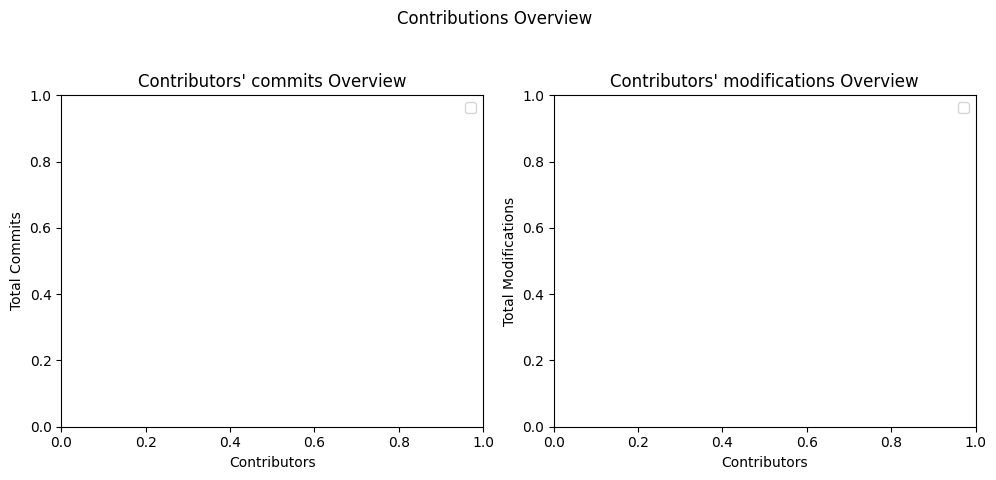

In [36]:
import time
def get_contributors(username, repository):
    url = f"https://api.github.com/repos/{username}/{repository}/stats/contributors"
    response = requests.get(url)   
    if response.status_code == 202:
        location_url = response.headers.get('Location')
        
        if location_url:
            while True:
                poll_response = requests.get(location_url)
                
                if poll_response.status_code == 200:
                    contributors_data = poll_response.json()
                    break
                elif poll_response.status_code == 202:

                    retry_after = poll_response.headers.get('Retry-After')
                    if retry_after:
                        time.sleep(int(retry_after))
                    else:
                        time.sleep(10000) 
                else:
                    print(f"Error: {poll_response.status_code}, {poll_response.text}")
                    break
    else:
        print(f"Error: {response.status_code}, {response.text}") 
    contributors_data = response.json()

    return contributors_data

def plot_contributions(contributors_data):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
    plt.suptitle('Contributions Overview')
    for contributor in contributors_data:
        author = contributor['author']['login']
        total_commits = sum(week['c'] for week in contributor['weeks'])

        additions = sum(week['a'] for week in contributor['weeks'][1:])
        deletions = sum(week['d'] for week in contributor['weeks'])

        bar_commits = axs[0].bar(author, total_commits, color='lightblue', label='Total Commits')
        axs[0].bar_label(bar_commits)

        bar_add = axs[1].bar(author, additions, color='lightgreen', label='Additions', alpha=0.7)
        axs[1].bar_label(bar_add)
        bar_del = axs[1].bar(author, deletions, color='lightcoral', label='Deletions', alpha=0.7)
        axs[1].bar_label(bar_del)

    axs[0].set_ylabel('Total Commits')
    axs[0].set_xlabel('Contributors')

    axs[1].set_ylabel('Total Modifications')
    axs[1].set_xlabel('Contributors')

    axs[0].set_title("Contributors' commits Overview")
    axs[1].set_title("Contributors' modifications Overview")

    axs[0].legend()
    axs[1].legend()


    plt.subplots_adjust(wspace=30)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

username = "gigachad0209"
repository = "Final-Project-LTKHDL"

contributors_data = get_contributors(username, repository)
plot_contributions(contributors_data)


# 7. Reference materials <a class="anchor" id="cc7"></a>

- https://www.datacamp.com/tutorial/geopandas-tutorial-geospatial-analysis
- Weekly homework and lab exercises in Programming for Data Science.
- Lab exercises in Introduction to Data Science.
